In [63]:
# Class of k-Nearest Neigbor Classifier


class kNN():
    maxTrain = []
    
    def __init__(self, k = 3, exp = 2):
    # constructor for kNN classifier 
    # k is the number of neighbor for local class estimation
    # exp is the exponent for the Minkowski distance
        self.k = k
        self.exp = exp
      
    def fit(self, X_train, Y_train):
    # training k-NN method
    # X_train is the training data given with input attributes. n-th row correponds to n-th instance.
    # Y_train is the output data (output vector): n-th element of Y_train is the output value for n-th instance in X_train.
        self.X_train = X_train
        self.Y_train = Y_train   
         
    def getDiscreteClassification(self, X_test):
    # predict-class k-NN method
    # X_test is the test data given with input attributes. Rows correpond to instances
    # Method outputs prediction vector Y_pred_test:  n-th element of Y_pred_test is the prediction for n-th instance in X_test
    
        Y_pred_test = [] #prediction vector Y_pred_test for all the test instances in X_test is initialized to empty list []

   
    
        for i in range(len(X_test)):   #iterate over all instances in X_test
            test_instance = X_test.iloc[i] #i-th test instance 
            
            distances = []  #list of distances of the i-th test_instance for all the train_instance s in X_train, initially empty.
          
            for j in range(len(self.X_train)):  #iterate over all instances in X_train
                train_instance = self.X_train.iloc[j] #j-th training instance 
                distance = self.Minkowski_distance(test_instance, train_instance) #distance between i-th test instance and j-th training instance  
                distances.append(distance) #add the distance to the list of distances of the i-th test_instance
        
            # Store distances in a dataframe. The dataframe has the index of Y_train in order to keep the correspondence with the classes of the training instances 
            df_dists = pd.DataFrame(data=distances, columns=['dist'], index = self.Y_train.index)
        
            # Sort distances, and only consider the k closest points in the new dataframe df_knn
            df_nn = df_dists.sort_values(by=['dist'], axis=0)
            df_knn =  df_nn[:self.k]
            
            # Note that the index df_knn.index of df_knn contains indices in Y_train of the k-closed training instances to 
            # the i-th test instance. Thus, the dataframe self.Y_train[df_knn.index] contains the classes of those k-closed 
            # training instances. Method value_counts() computes the counts (number of occurencies) for each class in 
            # self.Y_train[df_knn.index] in dataframe predictions. 
            predictions = self.Y_train[df_knn.index].value_counts()
                 
            # the first element of the index predictions.index contains the class with the highest count; i.e. the prediction y_pred_test.
            y_pred_test = predictions.index[0]

            # add the prediction y_pred_test to the prediction vector Y_pred_test for all the test instances in X_test
            Y_pred_test.append(y_pred_test)
        
        return Y_pred_test

    
    def Minkowski_distance(self, x1, x2):
    # computes the Minkowski distance of x1 and x2 for two labeled instances (x1,y1) and (x2,y2)
    
        # Set initial distance to 0
        distance = 0
    
        # Calculate Minkowski distance using the exponent exp
        for i in range(len(x1)):
            distance = distance + abs(x1[i] - x2[i])**self.exp
        
        distance = distance**(1/self.exp)
    
        return distance
    
    
    def normilize_maximum_absolute_scaling(self,df):   
        # copy the dataframe
        df_scaled = df.copy()
        # apply maximum absolute scaling 
        for column in df_scaled.columns:  
              df_scaled[column] = df_scaled[column]  / df_scaled[column].abs().max()
           
        return df_scaled
    
    def getClassProbs (self, X_test):
        
        Y_type_list =  Y_train.tolist()
        Y_type_no_dublicate = list(dict.fromkeys(Y_type_list))
#         print(Y_type_no_dublicate)
        df_probs = pd.DataFrame(index=Y_type_no_dublicate)
#         print(df_probs)
        
        Y_pred_test = [] #prediction vector Y_pred_test for all the test instances in X_test is initialized to empty list []
        for i in range(len(X_test)):   #iterate over all instances in X_test
            test_instance = X_test.iloc[i] #i-th test instance 
            
            distances = []  #list of distances of the i-th test_instance for all the train_instance s in X_train, initially empty.
          
            for j in range(len(self.X_train)):  #iterate over all instances in X_train
                train_instance = self.X_train.iloc[j] #j-th training instance 
                distance = self.Minkowski_distance(test_instance, train_instance) #distance between i-th test instance and j-th training instance  
                distances.append(distance) #add the distance to the list of distances of the i-th test_instance
        
            df_dists = pd.DataFrame(data=distances, columns=['dist'], index = self.Y_train.index)
            df_nn = df_dists.sort_values(by=['dist'], axis=0)
            df_knn =  df_nn[:self.k]
            predictions = self.Y_train[df_knn.index].value_counts()
            
            
            df_probs['test'+str(i)] = predictions/self.k
           
#             if i == 0:
#                 print(i)
#                 print ("==================>",predictions)
                
        
        print(df_probs)
                
                
        
        


In [64]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split 

from numpy.random import random
from sklearn.metrics import accuracy_score

##################################################
# Hold-out testing: Training and Test set creation
##################################################

data = pd.read_csv('glass.csv')
data.head()
Y = data['class']
X = data.drop(['class'],axis=1)



X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.34, random_state=10)

# range for the values of parameter k for kNN

# k_range = [1, 3, 5, 7, 9, 11, 13, 15, 17, 19, 21, 23, 25, 27, 29, 31]
k_range = [5]

trainAcc = np.zeros(len(k_range))
testAcc = np.zeros(len(k_range))


index = 0 
for k  in  k_range:
    clf = kNN(k)
    clf.fit(X_train, Y_train)
    Y_predTrain = clf.getDiscreteClassification(X_train)
    Y_predTest = clf.getDiscreteClassification(X_test)
    trainAcc[index] = accuracy_score(Y_train, Y_predTrain)
    testAcc[index] = accuracy_score(Y_test, Y_predTest)
    teast = clf.getClassProbs(X_test)
    
    index += 1
   
    
#########################################
# Plot of training and test accuracies
#########################################
# print(X_train)
# print(X_test)

# plt.plot(k_range,trainAcc,'ro-',k_range,testAcc,'bv--')
# plt.legend(['Training Accuracy','Test Accuracy'])
# plt.xlabel('k')
# plt.ylabel('Accuracy')

                        test0  test1  test2  test3  test4  test5  test6  \
'build wind float'        4.0    5.0    NaN    1.0    4.0    NaN    5.0   
'build wind non-float'    NaN    NaN    NaN    4.0    1.0    NaN    NaN   
headlamps                 NaN    NaN    4.0    NaN    NaN    5.0    NaN   
'vehic wind float'        1.0    NaN    NaN    NaN    NaN    NaN    NaN   
containers                NaN    NaN    1.0    NaN    NaN    NaN    NaN   
tableware                 NaN    NaN    NaN    NaN    NaN    NaN    NaN   

                        test7  test8  test9  ...  test63  test64  test65  \
'build wind float'        1.0    1.0    NaN  ...     NaN     5.0     4.0   
'build wind non-float'    1.0    2.0    5.0  ...     1.0     NaN     1.0   
headlamps                 1.0    NaN    NaN  ...     NaN     NaN     NaN   
'vehic wind float'        NaN    2.0    NaN  ...     NaN     NaN     NaN   
containers                NaN    NaN    NaN  ...     3.0     NaN     NaN   
tableware         

           RI        Na        Mg        Al        Si         K        Ca  \
166  0.989269  0.738780  0.881612  0.377483  0.971622  0.090177  0.528104   
21   0.994015  0.658803  0.000000  0.622517  0.957300  0.130435  0.817789   
136  0.989315  0.775604  0.942065  0.387417  0.967909  0.095008  0.495985   
206  0.988461  0.817031  0.000000  0.923841  0.974141  0.006441  0.558369   
75   0.988650  0.780207  0.899244  0.486755  0.960748  0.103060  0.491662   
..        ...       ...       ...       ...       ...       ...       ...   
113  0.988644  0.827388  0.000000  0.642384  0.976130  0.000000  0.523780   
64   0.993005  0.789413  0.937028  0.168874  0.951465  0.014493  0.621371   
15   0.989009  0.775604  0.876574  0.566225  0.961676  0.099839  0.493515   
125  0.989276  0.739931  0.896725  0.420530  0.970826  0.086957  0.517603   
9    0.989543  0.758918  0.982368  0.430464  0.959157  0.088567  0.521309   

           Ba        Fe  
166  0.000000  0.000000  
21   0.000000  0.918919

Text(0, 0.5, 'Accuracy')

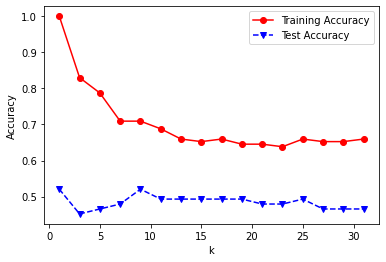

In [113]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split 

from numpy.random import random
from sklearn.metrics import accuracy_score

##################################################
# Hold-out testing: Training and Test set creation
##################################################

data = pd.read_csv('glass.csv')
data.head()
Y = data['class']
X = data.drop(['class'],axis=1)

X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.34, random_state=10)


# range for the values of parameter k for kNN

k_range = [1, 3, 5, 7, 9, 11, 13, 15, 17, 19, 21, 23, 25, 27, 29, 31]

trainAcc = np.zeros(len(k_range))
testAcc = np.zeros(len(k_range))

index = 0 
for k  in  k_range:
    clf = kNN(k)
    
    X_train = clf.normilize_maximum_absolute_scaling(X_train)
    X_test = clf.normilize_maximum_absolute_scaling(X_test)
    clf.fit(X_train, Y_train)
    Y_predTrain = clf.getDiscreteClassification(X_train)
    Y_predTest = clf.getDiscreteClassification(X_test)
    trainAcc[index] = accuracy_score(Y_train, Y_predTrain)
    testAcc[index] = accuracy_score(Y_test, Y_predTest)
    index += 1

   
    
# #########################################
# # Plot of training and test accuracies
# #########################################
# # trainAcc
print(X_train)
print(X_test)

plt.plot(k_range,trainAcc,'ro-',k_range,testAcc,'bv--')
plt.legend(['Training Accuracy','Test Accuracy'])
plt.xlabel('k')
plt.ylabel('Accuracy')


# changing exp for glass data


not normalize


<ipython-input-112-c08c10cd0486>:69: RuntimeWarning: overflow encountered in double_scalars
  distance = distance + abs(x1[i] - x2[i])**self.exp


Text(0, 0.5, 'Accuracy')

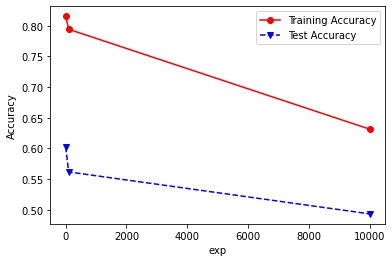

In [118]:
import matplotlib.pyplot as plt
import numpy as np
from sklearn.metrics import accuracy_score
from numpy.random import random

##################################################
# Hold-out testing: Training and Test set creation
##################################################

data = pd.read_csv('glass.csv')
data.head()
Y = data['class']
X = data.drop(['class'],axis=1)

X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.34, random_state=10)


# range for the values of parameter exp for kNN

exp_range = [2,  100, 10000]

trainAcc = np.zeros(len(exp_range))
testAcc = np.zeros(len(exp_range))


index = 0 
for exp  in  exp_range:
    clf = kNN(k = 3, exp = exp)
    clf.fit(X_train, Y_train)
    Y_predTrain = clf.getDiscreteClassification(X_train)
    Y_predTest = clf.getDiscreteClassification(X_test)
    trainAcc[index] = accuracy_score(Y_train, Y_predTrain)
    testAcc[index] = accuracy_score(Y_test, Y_predTest)
    index += 1
   
    
#########################################
# Plot of training and test accuracies
#########################################


plt.plot(exp_range,trainAcc,'ro-',exp_range,testAcc,'bv--')
plt.legend(['Training Accuracy','Test Accuracy'])
plt.xlabel('exp')
plt.ylabel('Accuracy')


           RI        Na        Mg        Al        Si         K        Ca  \
166  0.989269  0.738780  0.881612  0.377483  0.971622  0.090177  0.528104   
21   0.994015  0.658803  0.000000  0.622517  0.957300  0.130435  0.817789   
136  0.989315  0.775604  0.942065  0.387417  0.967909  0.095008  0.495985   
206  0.988461  0.817031  0.000000  0.923841  0.974141  0.006441  0.558369   
75   0.988650  0.780207  0.899244  0.486755  0.960748  0.103060  0.491662   
..        ...       ...       ...       ...       ...       ...       ...   
113  0.988644  0.827388  0.000000  0.642384  0.976130  0.000000  0.523780   
64   0.993005  0.789413  0.937028  0.168874  0.951465  0.014493  0.621371   
15   0.989009  0.775604  0.876574  0.566225  0.961676  0.099839  0.493515   
125  0.989276  0.739931  0.896725  0.420530  0.970826  0.086957  0.517603   
9    0.989543  0.758918  0.982368  0.430464  0.959157  0.088567  0.521309   

           Ba        Fe  
166  0.000000  0.000000  
21   0.000000  0.918919

Text(0, 0.5, 'Accuracy')

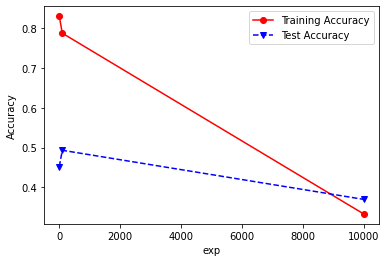

In [123]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split 

from numpy.random import random
from sklearn.metrics import accuracy_score

##################################################
# Normalize testing: Training and Test set creation
##################################################

data = pd.read_csv('glass.csv')
data.head()
Y = data['class']
X = data.drop(['class'],axis=1)

X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.34, random_state=10)


# range for the values of parameter exp for kNN

exp_range = [2,  100, 10000]

trainAcc = np.zeros(len(exp_range))
testAcc = np.zeros(len(exp_range))


index = 0 
for exp  in  exp_range:
    
    clf = kNN(k = 3, exp = exp)
    X_train = clf.normilize_maximum_absolute_scaling(X_train)
    X_test = clf.normilize_maximum_absolute_scaling(X_test)
    clf.fit(X_train, Y_train)
    Y_predTrain = clf.getDiscreteClassification(X_train)
    Y_predTest = clf.getDiscreteClassification(X_test)
    trainAcc[index] = accuracy_score(Y_train, Y_predTrain)
    testAcc[index] = accuracy_score(Y_test, Y_predTest)
    index += 1

    
# #########################################
# # Plot of training and test accuracies
# #########################################
# # trainAcc
print(X_train)
print(X_test)

plt.plot(exp_range,trainAcc,'ro-',exp_range,testAcc,'bv--')
plt.legend(['Training Accuracy','Test Accuracy'])
plt.xlabel('exp')
plt.ylabel('Accuracy')

In [ ]:
from sklearn.metrics import mean_absolute_error
y_true = [3, -0.5, 2, 7]
y_pred = [2.5, 0.0, 2, 8]
mean_absolute_error(y_true, y_pred)

In [ ]:
data = pd.read_csv('autoprice.csv')
data.head()
Y = data['class']
X = data.drop(['class'],axis=1)
data.head()